# **Interactive GHG Emissions Predictive Analysis Model**

## 📚 Libraries and Pipeline Setup

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries loaded!")

Libraries loaded!


## 📥 Loading Data

In [12]:
# Loading data
df = pd.read_csv(f"/content/ghg-emissions.csv")  # Dataset uploaded to Jupyter
# Normalize country names
df['Country/Region'] = df['Country/Region'].str.strip()  # Remove leading/trailing spaces
df['Country/Region'] = df['Country/Region'].str.title()  # Standardize capitalization
print(df.head(10))

  Country/Region    unit     1990     1991     1992     1993     1994  \
0          China  MtCO2e  2873.71  3023.38  3154.54  3377.79  3528.81   
1  United States  MtCO2e  5543.47  5501.92  5583.80  5691.26  5782.20   
2          India  MtCO2e  1009.44  1064.49  1096.71  1128.44  1174.78   
3         Russia  MtCO2e  2885.12  2788.70  2551.94  2294.62  2011.47   
4      Indonesia  MtCO2e  1257.10  1274.43  1295.01  1311.27  1327.87   
5         Brazil  MtCO2e  1642.29  1669.56  1679.50  1689.70  1706.03   
6          Japan  MtCO2e  1109.37  1123.86  1137.15  1129.63  1186.79   
7           Iran  MtCO2e   240.54   280.88   301.84   300.14   332.67   
8        Germany  MtCO2e  1109.28  1079.69  1032.01  1024.31  1011.41   
9         Canada  MtCO2e   626.36   622.29   638.22   636.25   656.82   

      1995     1996     1997  ...     2010      2011      2012      2013  \
0  3918.30  3954.75  3963.61  ...  9872.37  10364.83  10690.04  11144.76   
1  5843.90  6010.62  6258.47  ...  6041.59  

In [4]:
# Checking columns for missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country/Region   193 non-null    object 
 1   unit             193 non-null    object 
 2   1990             193 non-null    float64
 3   1991             193 non-null    float64
 4   1992             193 non-null    float64
 5   1993             193 non-null    float64
 6   1994             193 non-null    float64
 7   1995             193 non-null    float64
 8   1996             193 non-null    float64
 9   1997             193 non-null    float64
 10  1998             193 non-null    float64
 11  1999             193 non-null    float64
 12  2000             193 non-null    float64
 13  2001             193 non-null    float64
 14  2002             193 non-null    float64
 15  2003             193 non-null    float64
 16  2004             193 non-null    float64
 17  2005            

In [5]:
# Create lag features (for time-series forecasting)
df['Emissions_Lag1'] = df.groupby('Country/Region')['Total Emissions'].shift(1)
df.dropna(inplace=True)  # Remove rows with NaN after lag

## 🔎 EDA Plot Data

### Installing Widgets

In [6]:
# installing required widgets in Colab
!pip install ipywidgets
from ipywidgets import interact, Dropdown
from IPython.display import display
from google.colab import output
output.enable_custom_widget_manager()  # Needed for Colab interactivity


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00


In [7]:
# Prepare data
year_columns = [str(year) for year in range(1990, 2019)]
countries = df['Country/Region'].unique()

In [8]:
#Checking Data Output
for index, row in df.iterrows():
    country = row['Country/Region']
    print(f"\nCountry: {country}")

    # Print emissions for each year (1990-2018)
    for year in year_columns:
        emission = row[year]
        print(f"{year}: {emission} MtCO2e", end=" | ")  # Print inline for readability

### GHG Emission Trend by Country (1990-2018)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown


# Extract year columns (1990-2018)
year_columns = [str(year) for year in range(1990, 2019)]

# Interactive plot function
def plot_ghg_emissions(country):
    plt.figure(figsize=(12, 6))

    # Get emissions data for selected country
    country_data = df[df['Country/Region'] == country].iloc[0]
    emissions = pd.to_numeric(country_data[year_columns], errors='coerce')

    # Plot the data
    plt.plot(range(1990, 2019), emissions, 'b-o', linewidth=2, markersize=6)

    # Formatting
    plt.title(f"GHG Emissions Trend: {country} (1990-2018)", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Emissions (MtCO2e)", fontsize=12)
    plt.xlim(1990, 2018)
    plt.xticks(range(1990, 2019, 1))  # Show every year
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Create dropdown menu
country_dropdown = Dropdown(
    options=sorted(df['Country/Region'].unique()),
    description='Select Country:',
    style={'description_width': 'initial'}
)

# Display interactive plot
interact(plot_ghg_emissions, country=country_dropdown)

print(" Use the dropdown above to explore each country's emissions.")

interactive(children=(Dropdown(description='Select Country:', options=('Afghanistan', 'Albania', 'Algeria', 'A…

 Use the dropdown above to explore each country's emissions.


### Total Emissions From All Countries

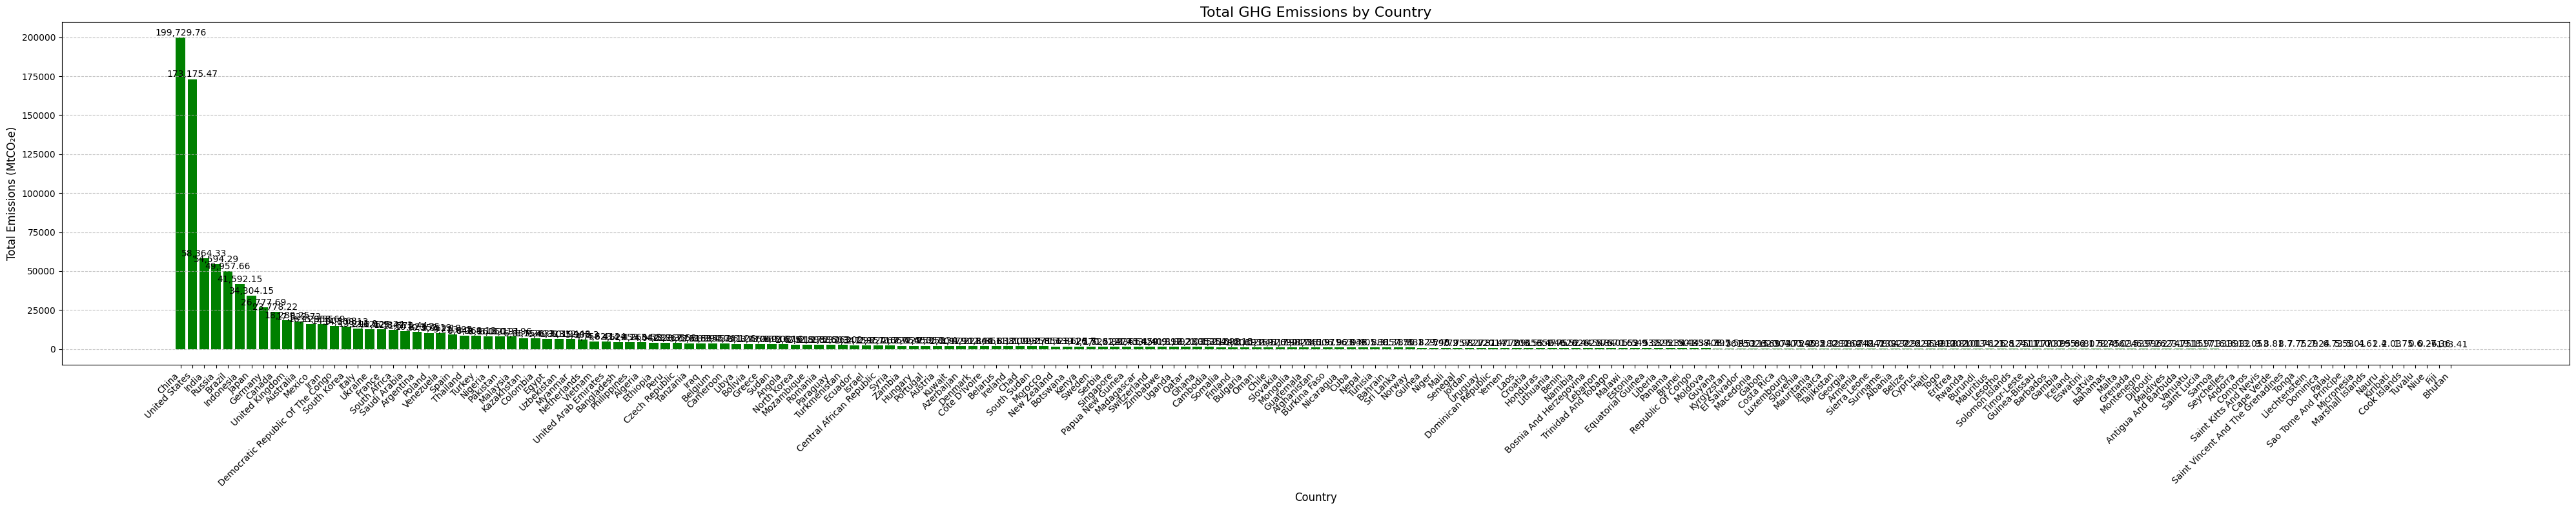

In [14]:
plt.figure(figsize=(40, 8))

# Sort data by emissions (descending) for better visualization
df_sorted = df.sort_values('Total Emissions', ascending=False)

# Plot bars
plt.bar(
    df_sorted['Country/Region'],  # X-axis: Countries
    df_sorted['Total Emissions'], # Y-axis: Emissions
    color='Green'
)

# Customize the plot
plt.title('Total GHG Emissions by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Emissions (MtCO₂e)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, val in enumerate(df_sorted['Total Emissions']):
    plt.text(i, val + 50, f'{val:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [15]:
import plotly.express as px

fig = px.bar(
    df_sorted,
    x='Country/Region',
    y='Total Emissions',
    title='Total GHG Emissions by Country',
    labels={'Total Emissions': 'Emissions (MtCO₂e)'},
    color='Total Emissions',
    color_continuous_scale='Rainbow'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## 🌍 Time Series Analysis

In [18]:
# @title  Time Series Analysis Dashboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from IPython.display import display

# 📊 Data Preparation
# Convert to datetime-indexed DataFrame
df_time = df.melt(id_vars=['Country/Region', 'unit'],
                 value_vars=[str(y) for y in range(1990,2019)],
                 var_name='Year', value_name='Emissions')

df_time['Year'] = pd.to_datetime(df_time['Year'])
df_time['Emissions'] = pd.to_numeric(df_time['Emissions'], errors='coerce')
df_time = df_time.dropna()

# 🔍 Interactive Analysis
def analyze_country(country):
    country_data = df_time[df_time['Country/Region'] == country]
    ts = country_data.set_index('Year')['Emissions']

    # Create figure
    plt.figure(figsize=(13, 12))

    # Raw Time Series
    plt.subplot(3, 2, 1)
    ts.plot(title=f'{country} - Raw Time Series', color='#1f77b4')
    plt.ylabel('Emissions')
    plt.grid(True, alpha=0.3)

    # Rolling Statistics
    plt.subplot(3, 2, 2)
    rolling_mean = ts.rolling(window=5).mean()
    rolling_std = ts.rolling(window=5).std()
    plt.plot(ts, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean (5y)')
    plt.plot(rolling_std, label='Rolling Std (5y)')
    plt.title('Rolling Statistics')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Seasonal Decomposition
    plt.subplot(3, 2, 3)
    decomposition = seasonal_decompose(ts, model='additive', period=5)
    decomposition.trend.plot(title='Trend Component')
    plt.grid(True, alpha=0.3)

    plt.subplot(3, 2, 4)
    decomposition.seasonal.plot(title='Seasonality Component')
    plt.grid(True, alpha=0.3)

    # ACF/PACF
    plt.subplot(3, 2, 5)
    plot_acf(ts, lags=15, ax=plt.gca())
    plt.title('Autocorrelation')

    plt.subplot(3, 2, 6)
    plot_pacf(ts, lags=13, ax=plt.gca())
    plt.title('Partial Autocorrelation')

    plt.tight_layout()
    plt.show()

    # Display summary stats
    display(pd.DataFrame({
        'Statistic': ['Mean', 'Std Dev', 'Min', 'Max', 'Trend (Slope)'],
        'Value': [
            ts.mean(),
            ts.std(),
            ts.min(),
            ts.max(),
            np.polyfit(range(len(ts)), ts, 1)[0]
    ]}))

#🎚️ Interactive Controls
country_selector = widgets.Dropdown(
    options=sorted(df_time['Country/Region'].unique()),
    description='Select Country:',
    style={'description_width': '150px'},
    layout={'width': '300px'}
)

widgets.interactive(analyze_country, country=country_selector)

interactive(children=(Dropdown(description='Select Country:', layout=Layout(width='300px'), options=('Afghanis…

### Model Training and Evaluation

📊 Model Performance:
RMSE: 72.00
R² Score: 0.99


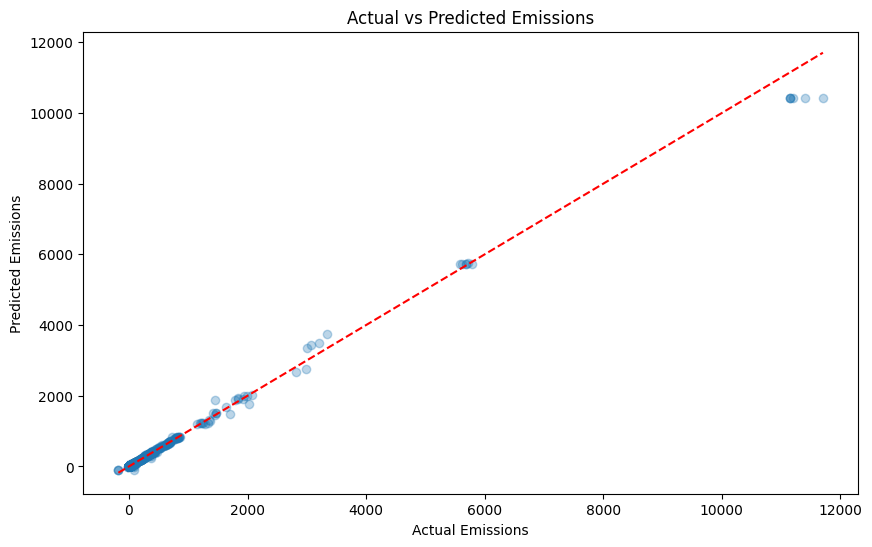

🎯 Best Parameters: {'max_depth': None, 'n_estimators': 50}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📝 Sample Prediction for 2019:
Predicted emissions: 5656.89 MtCO2e


In [41]:
# @title 🔧 Model Pipeline Setup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from google.colab import files

# Load Prepared Data (from previous steps)
# Assuming df_time is our cleaned DataFrame from earlier
df_time = df_time.sort_values(['Country/Region', 'Year'])

# Feature Engineering
def create_features(df):
    """Create time-series features from datetime index"""
    df = df.copy()
    df['year'] = df['Year'].dt.year
    df['lag_1'] = df.groupby('Country/Region')['Emissions'].shift(1)
    df['rolling_mean_3'] = df.groupby('Country/Region')['Emissions'].transform(
        lambda x: x.rolling(3).mean())
    return df.dropna()

df_feat = create_features(df_time)

# Train-Test Split (Time Series Aware)
countries = df_feat['Country/Region'].unique()
X_train, X_test = [], []

for country in countries:
    country_data = df_feat[df_feat['Country/Region'] == country]
    split_idx = int(len(country_data) * 0.8)  # 80% train, 20% test
    X_train.append(country_data.iloc[:split_idx])
    X_test.append(country_data.iloc[split_idx:])

X_train = pd.concat(X_train)
X_test = pd.concat(X_test)

y_train = X_train['Emissions']
y_test = X_test['Emissions']
X_train = X_train[['year', 'lag_1', 'rolling_mean_3']]
X_test = X_test[['year', 'lag_1', 'rolling_mean_3']]

# Model Training & Evaluation
# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"📊 Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Actual vs Predicted Emissions')
plt.show()

# @title 🎛️ Hyperparameter Tuning (Optional)
from sklearn.model_selection import GridSearchCV

#  Run only if you need improved performance
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=TimeSeriesSplit(3), scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"🎯 Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# @title 💾 Model Deployment
# Save model
joblib.dump(model, 'emissions_model.pkl')

# Download to local machine
files.download('emissions_model.pkl')

# Inference Example
def predict_emissions(country, year, last_emission, rolling_avg):
    """Predict emissions for new data"""
    model = joblib.load('emissions_model.pkl')
    features = pd.DataFrame({
        'year': [year],
        'lag_1': [last_emission],
        'rolling_mean_3': [rolling_avg]
    })
    return model.predict(features)[0]

# Example usage
print(f"📝 Sample Prediction for 2019:")
print(f"Predicted emissions: {predict_emissions('United States', 2019, 5000, 5100):.2f} MtCO2e")

📊 Global Model Performance:
RMSE: 535.32
R² Score: 0.98


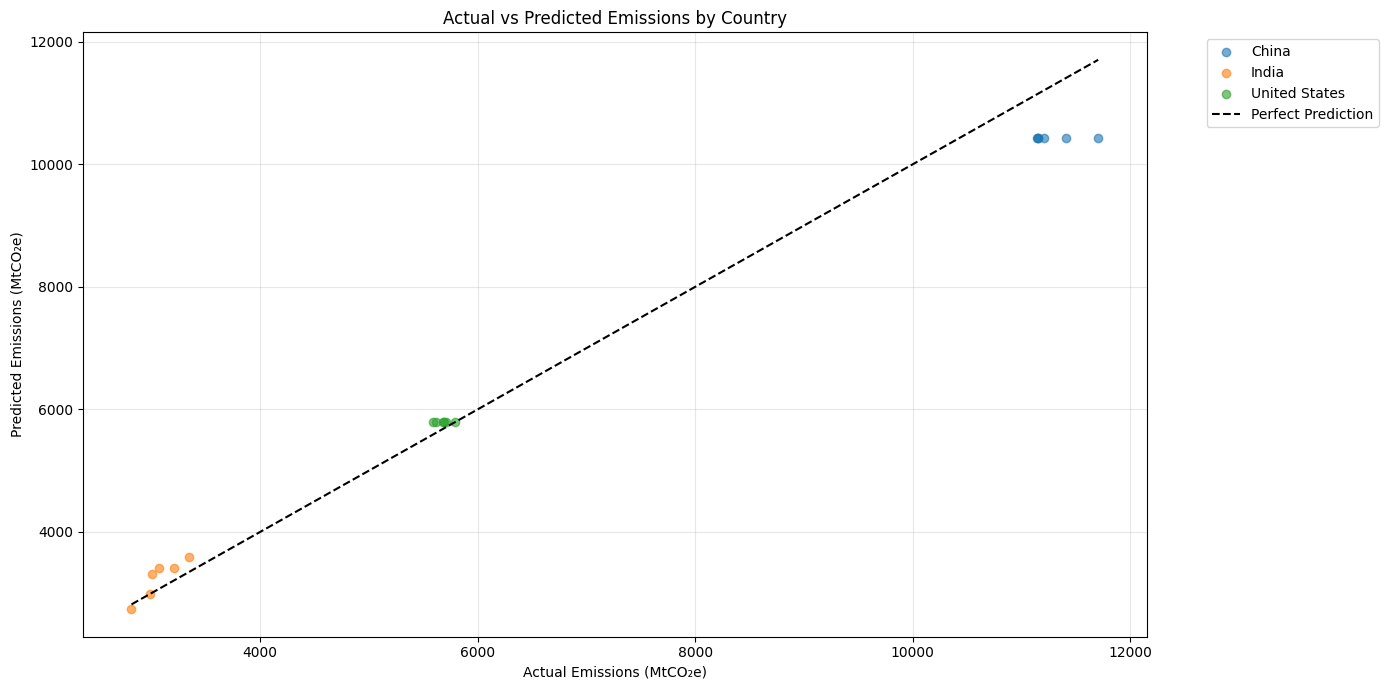


🏆 Top Performing Countries:


,Country,Test Samples,RMSE,R² Score
1,India,6,228.362491,-0.843857
2,United States,6,134.400824,-2.973568
0,China,6,888.527008,-17.774941


In [42]:
# @title 🚀  Top-Country Implementation (Actual vs. Predicted)
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare data
df_time = df_time.sort_values(['Country/Region', 'Year'])

# Define target countries
TARGET_COUNTRIES = ['China', 'United States', 'India']  # Customize this list
df_filtered = df_time[df_time['Country/Region'].isin(TARGET_COUNTRIES)].copy()  # Now defined!

# Feature engineering function
def create_features(df):
    """Create time-series features from datetime index"""
    df = df.copy()
    df['year'] = df['Year'].dt.year
    df['lag_1'] = df.groupby('Country/Region')['Emissions'].shift(1)
    df['rolling_mean_3'] = df.groupby('Country/Region')['Emissions'].transform(
        lambda x: x.rolling(3).mean())
    return df.dropna()

# Create features
df_feat = create_features(df_filtered)  # Now this works!

# Train-test split
countries = df_feat['Country/Region'].unique()
X_train, X_test, y_train, y_test = [], [], [], []

for country in countries:
    country_data = df_feat[df_feat['Country/Region'] == country]
    split_idx = int(len(country_data) * 0.8)  # 80% train, 20% test
    X_train.append(country_data.iloc[:split_idx])
    X_test.append(country_data.iloc[split_idx:])

X_train = pd.concat(X_train)
X_test = pd.concat(X_test)
y_train = X_train['Emissions']
y_test = X_test['Emissions']
X_train = X_train[['year', 'lag_1', 'rolling_mean_3']]
X_test = X_test[['year', 'lag_1', 'rolling_mean_3']]

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"📊 Global Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization
X_test_countries = X_test.index.map(df_feat['Country/Region'])  # Now df_feat exists

plt.figure(figsize=(14, 7))
for country in countries[:10]:  # First 10 countries
    mask = X_test_countries == country
    if sum(mask) > 0:
        plt.scatter(y_test[mask], predictions[mask], alpha=0.6, label=country)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Actual Emissions (MtCO₂e)')
plt.ylabel('Predicted Emissions (MtCO₂e)')
plt.title('Actual vs Predicted Emissions by Country')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Country-specific metrics
country_results = []
for country in countries:
    mask = X_test_countries == country
    if sum(mask) > 1:
        rmse = np.sqrt(mean_squared_error(y_test[mask], predictions[mask]))
        r2 = r2_score(y_test[mask], predictions[mask])
        country_results.append({
            'Country': country,
            'Test Samples': sum(mask),
            'RMSE': rmse,
            'R² Score': r2
        })

results_df = pd.DataFrame(country_results).sort_values('R² Score', ascending=False)
print("\n🏆 Top Performing Countries:")
display(results_df.head(10).style.background_gradient(cmap='Blues'))

🔍 Model Performance by Country:


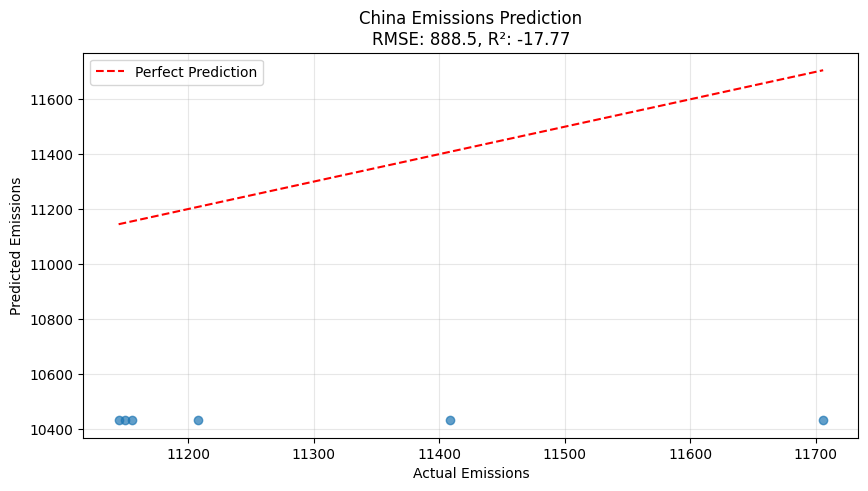

China: RMSE = 888.5, R² = -17.77


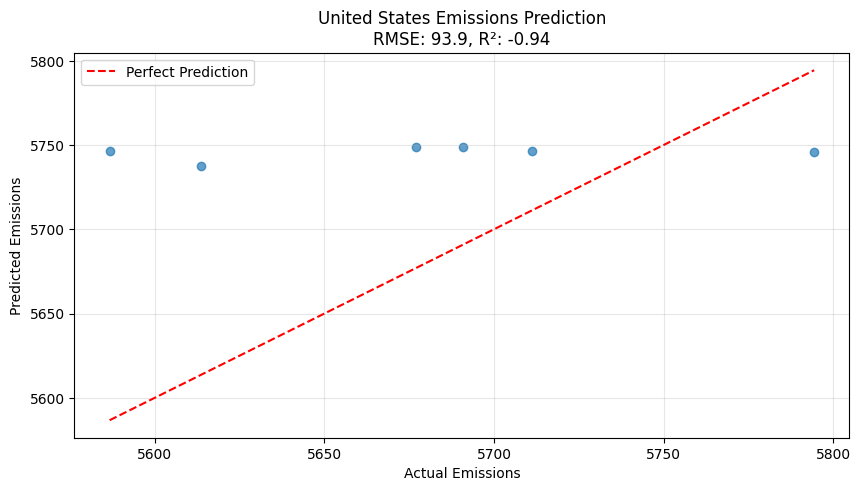

United States: RMSE = 93.9, R² = -0.94


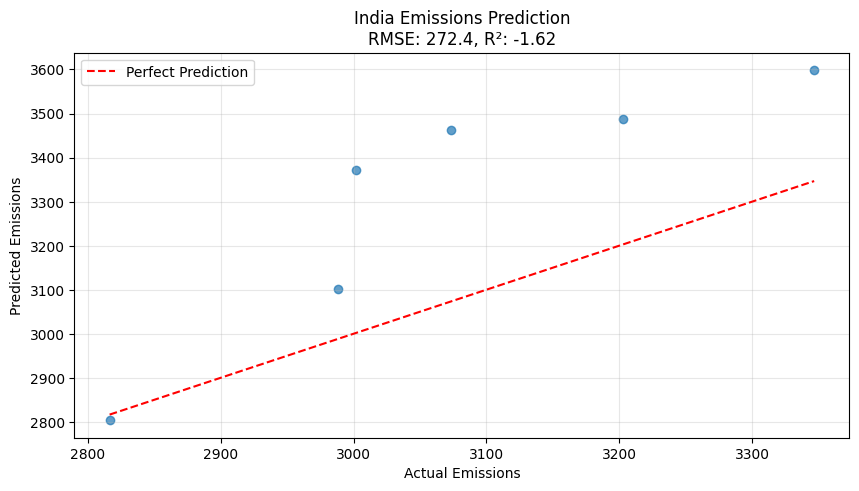

India: RMSE = 272.4, R² = -1.62


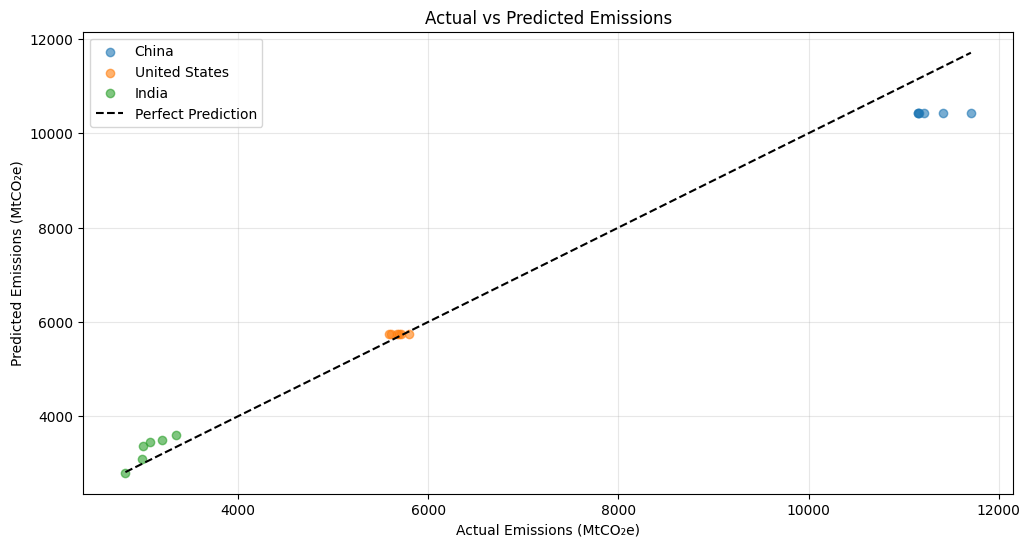

In [43]:
# @title 🎯 Country-Focused Model Training
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Country Selection
TARGET_COUNTRIES = ['China', 'United States', 'India']  # 👈 Edit this list

# 2. Filter Data
df_filtered = df_time[df_time['Country/Region'].isin(TARGET_COUNTRIES)].copy()
df_feat = create_features(df_filtered)  # Using existing function in the previous code

# 3. Train-Test Split (Time Series Aware)
X_train, X_test = [], []
for country in TARGET_COUNTRIES:
    country_data = df_feat[df_feat['Country/Region'] == country]
    split_idx = int(len(country_data) * 0.8)  # 80% train, 20% test
    X_train.append(country_data.iloc[:split_idx])
    X_test.append(country_data.iloc[split_idx:])

X_train = pd.concat(X_train)
X_test = pd.concat(X_test)

y_train = X_train['Emissions']
y_test = X_test['Emissions']
X_train = X_train[['year', 'lag_1', 'rolling_mean_3']]
X_test = X_test[['year', 'lag_1', 'rolling_mean_3']]

# 4. Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Country-Specific Evaluation
def evaluate_country(country):
    country_mask = X_test.index.map(df_feat['Country/Region']) == country
    y_true = y_test[country_mask]
    y_pred = model.predict(X_test[country_mask])

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'r--', label='Perfect Prediction')
    plt.title(f'{country} Emissions Prediction\nRMSE: {rmse:.1f}, R²: {r2:.2f}')
    plt.xlabel('Actual Emissions')
    plt.ylabel('Predicted Emissions')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    return rmse, r2

# 6. Evaluate Each Target Country
print("🔍 Model Performance by Country:")
for country in TARGET_COUNTRIES:
    rmse, r2 = evaluate_country(country)
    print(f"{country}: RMSE = {rmse:.1f}, R² = {r2:.2f}")

# 7. Combined Scatter Plot
plt.figure(figsize=(12, 6))
for country in TARGET_COUNTRIES:
    country_mask = X_test.index.map(df_feat['Country/Region']) == country
    plt.scatter(y_test[country_mask],
                model.predict(X_test[country_mask]),
                alpha=0.6,
                label=country)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', label='Perfect Prediction')
plt.title('Actual vs Predicted Emissions')
plt.xlabel('Actual Emissions (MtCO₂e)')
plt.ylabel('Predicted Emissions (MtCO₂e)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [44]:
# @title 🌐 Interactive Emissions Predictor
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Prepare features for all countries
df_features = create_features(df_time)
countries = sorted(df_time['Country/Region'].unique())

# UI Components
country_dropdown = widgets.Dropdown(
    options=countries,
    description='Country:',
    style={'description_width': '100px'}
)

year_slider = widgets.IntSlider(
    value=2019,
    min=2019,
    max=2030,
    step=1,
    description='Year:',
    style={'description_width': '100px'}
)

window_slider = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    step=1,
    description='Rolling Years:',
    style={'description_width': '100px'}
)

prediction_output = widgets.Output()
plot_output = widgets.Output()

def update_prediction(change):
    with prediction_output:
        prediction_output.clear_output()

        # Get selected country data
        country = country_dropdown.value
        target_year = year_slider.value
        window = window_slider.value

        # Calculate features
        country_data = df_time[df_time['Country/Region'] == country]
        last_year = country_data['Year'].dt.year.max()
        last_emission = country_data[country_data['Year'].dt.year == last_year]['Emissions'].values[0]

        # Calculate rolling avg
        rolling_avg = country_data[
            country_data['Year'].dt.year.between(last_year - window + 1, last_year)
        ]['Emissions'].mean()

        # Make prediction
        pred = predict_emissions(country, target_year, last_emission, rolling_avg)

        # Display results
        print(f"🇺🇳 {country} Emissions Forecast")
        print("───────────────────────")
        print(f"▪ Last available year: {last_year} ({last_emission:,.2f} MtCO₂e)")
        print(f"▪ {window}-year average: {rolling_avg:,.2f} MtCO₂e")
        print(f"▪ Predicted {target_year}: {pred:,.2f} MtCO₂e")

    with plot_output:
        plot_output.clear_output()
        fig, ax = plt.subplots(figsize=(12, 5))

        # Plot historical data
        history = country_data.sort_values('Year')
        ax.plot(history['Year'].dt.year, history['Emissions'],
                'b-o', label='Historical')

        # Plot prediction
        ax.plot(target_year, pred, 'r*', markersize=12,
                label=f'Predicted {target_year}')

        # Formatting
        ax.set_title(f"{country}'s Emissions Trend & Forecast", pad=20)
        ax.set_xlabel("Year")
        ax.set_ylabel("Emissions (MtCO₂e)")
        ax.legend()
        ax.grid(True, linestyle=':')
        plt.tight_layout()
        plt.show()

# Set up interactivity
for widget in [country_dropdown, year_slider, window_slider]:
    widget.observe(update_prediction, names='value')

# Initial calculation
update_prediction(None)

# Display UI
display(widgets.VBox([
    widgets.HBox([country_dropdown, year_slider, window_slider]),
    prediction_output,
    plot_output
]))